In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import asterion as ast

ast.style.use("asterion-light")

/Users/alyttle/.pyenv/versions/asterion/lib/python3.9/site-packages/jax/_src/lib/__init__.py:33: UserWarning: JAX on Mac ARM machines is experimental and minimally tested. Please see https://github.com/google/jax/issues/5501 in the event of problems.
  warnings.warn("JAX on Mac ARM machines is experimental and minimally tested. "


In [3]:
sample = pd.read_csv("data/mesa_sample.csv")
sample.head()

,dirname,filename,initial_mass,initial_Yinit,initial_feh,initial_MLT,effective_T,radius,delta_nu,nu_max,...,nu_0_31,nu_0_32,nu_0_33,nu_0_34,nu_0_35,nu_0_36,nu_0_37,nu_0_38,nu_0_39,nu_0_40
0,m1.1Y0.28FeH-0.5MLT1.9ov0.005000000000000001dif1,profile754,1.1,0.28,-0.5,1.9,6649.442764,1.456094,80.145662,1499.113065,...,2440.063680,2507.615156,2576.479333,2648.381377,2722.666879,2798.370599,2875.061322,2952.163637,3029.563026,3106.970156
1,m1.2Y0.28FeH0.0MLT2.3ov0.006444444444444444dif0,profile655,1.2,0.28,0.0,2.3,6398.378979,1.432515,89.605723,1722.507281,...,2759.425546,2843.653369,2926.254315,3006.673548,3084.775031,3162.274939,3241.234395,3322.555273,3405.911016,3490.643346
2,m1.4Y0.28FeH0.5MLT2.1ov0.009333333333333329dif0,profile1207,1.4,0.28,0.5,2.1,4360.220783,12.198463,3.965772,33.517390,...,114.469701,118.196846,121.890277,125.530228,129.116015,132.678060,136.257226,139.882614,143.561890,147.285775
3,m0.8Y0.32FeH0.5MLT2.3ov0.0006666666666666673dif1,profile649,0.8,0.32,0.5,2.3,4940.200668,0.838607,164.572794,3813.415241,...,5140.497596,5300.698392,5461.065311,5621.168062,5780.827166,5939.793233,6096.500770,6247.211387,6399.659338,6548.584318
4,m0.8Y0.24FeH-0.5MLT2.3ov0.0006666666666666673dif1,profile745,0.8,0.24,-0.5,2.3,5773.991040,0.984567,130.505068,2559.021553,...,4021.946990,4143.373266,4262.333882,4378.074624,4491.626437,4605.922404,4722.865089,4843.152020,4965.725011,5089.866620


In [4]:
results = pd.read_csv("data/mesa_results.csv", index_col="index")
results.head()

,a_cz_mean,a_cz_sd,a_cz_16th,a_cz_50th,a_cz_84th,a_he_mean,a_he_sd,a_he_16th,a_he_50th,a_he_84th,...,tau_cz_mean,tau_cz_sd,tau_cz_16th,tau_cz_50th,tau_cz_84th,tau_he_mean,tau_he_sd,tau_he_16th,tau_he_50th,tau_he_84th
index,,,,,,,,,,,,,,,,,,,,,
2,1.885047e+01,10.095606,1.053841e+01,1.632693e+01,2.759089e+01,0.008999,0.000937,0.008038,0.009029,0.009917,...,0.131176,0.014851,0.115597,0.130507,0.149163,0.054340,0.000719,0.053681,0.054239,0.055034
3,1.753052e+06,17624.489574,1.734847e+06,1.753352e+06,1.770464e+06,0.014946,0.010840,0.005766,0.011880,0.025059,...,0.002201,0.000003,0.002198,0.002201,0.002204,0.000365,0.000043,0.000320,0.000367,0.000408
4,4.343677e+05,9761.947280,4.252012e+05,4.343044e+05,4.439601e+05,0.020117,0.011896,0.007354,0.018021,0.033469,...,0.002463,0.000009,0.002454,0.002463,0.002473,0.000738,0.000037,0.000703,0.000732,0.000780
1,2.004997e+05,1789.448883,1.988260e+05,2.003872e+05,2.022364e+05,0.012954,0.003368,0.009780,0.012617,0.016261,...,0.003202,0.000014,0.003188,0.003202,0.003217,0.000991,0.000023,0.000969,0.000990,0.001014
0,2.109229e+04,2210.080779,1.881621e+04,2.116416e+04,2.324776e+04,0.005212,0.000966,0.004221,0.005081,0.006250,...,0.004092,0.000048,0.004044,0.004097,0.004139,0.001503,0.000035,0.001468,0.001508,0.001533


In [5]:
total = sample.merge(results, left_index=True, right_index=True)
total.head()

,dirname,filename,initial_mass,initial_Yinit,initial_feh,initial_MLT,effective_T,radius,delta_nu,nu_max,...,tau_cz_mean,tau_cz_sd,tau_cz_16th,tau_cz_50th,tau_cz_84th,tau_he_mean,tau_he_sd,tau_he_16th,tau_he_50th,tau_he_84th
0,m1.1Y0.28FeH-0.5MLT1.9ov0.005000000000000001dif1,profile754,1.1,0.28,-0.5,1.9,6649.442764,1.456094,80.145662,1499.113065,...,0.004092,0.000048,0.004044,0.004097,0.004139,0.001503,0.000035,0.001468,0.001508,0.001533
1,m1.2Y0.28FeH0.0MLT2.3ov0.006444444444444444dif0,profile655,1.2,0.28,0.0,2.3,6398.378979,1.432515,89.605723,1722.507281,...,0.003202,0.000014,0.003188,0.003202,0.003217,0.000991,0.000023,0.000969,0.000990,0.001014
2,m1.4Y0.28FeH0.5MLT2.1ov0.009333333333333329dif0,profile1207,1.4,0.28,0.5,2.1,4360.220783,12.198463,3.965772,33.517390,...,0.131176,0.014851,0.115597,0.130507,0.149163,0.054340,0.000719,0.053681,0.054239,0.055034
3,m0.8Y0.32FeH0.5MLT2.3ov0.0006666666666666673dif1,profile649,0.8,0.32,0.5,2.3,4940.200668,0.838607,164.572794,3813.415241,...,0.002201,0.000003,0.002198,0.002201,0.002204,0.000365,0.000043,0.000320,0.000367,0.000408
4,m0.8Y0.24FeH-0.5MLT2.3ov0.0006666666666666673dif1,profile745,0.8,0.24,-0.5,2.3,5773.991040,0.984567,130.505068,2559.021553,...,0.002463,0.000009,0.002454,0.002463,0.002473,0.000738,0.000037,0.000703,0.000732,0.000780


In [6]:
total["log_nu_max"] = np.log10(total["nu_max"])

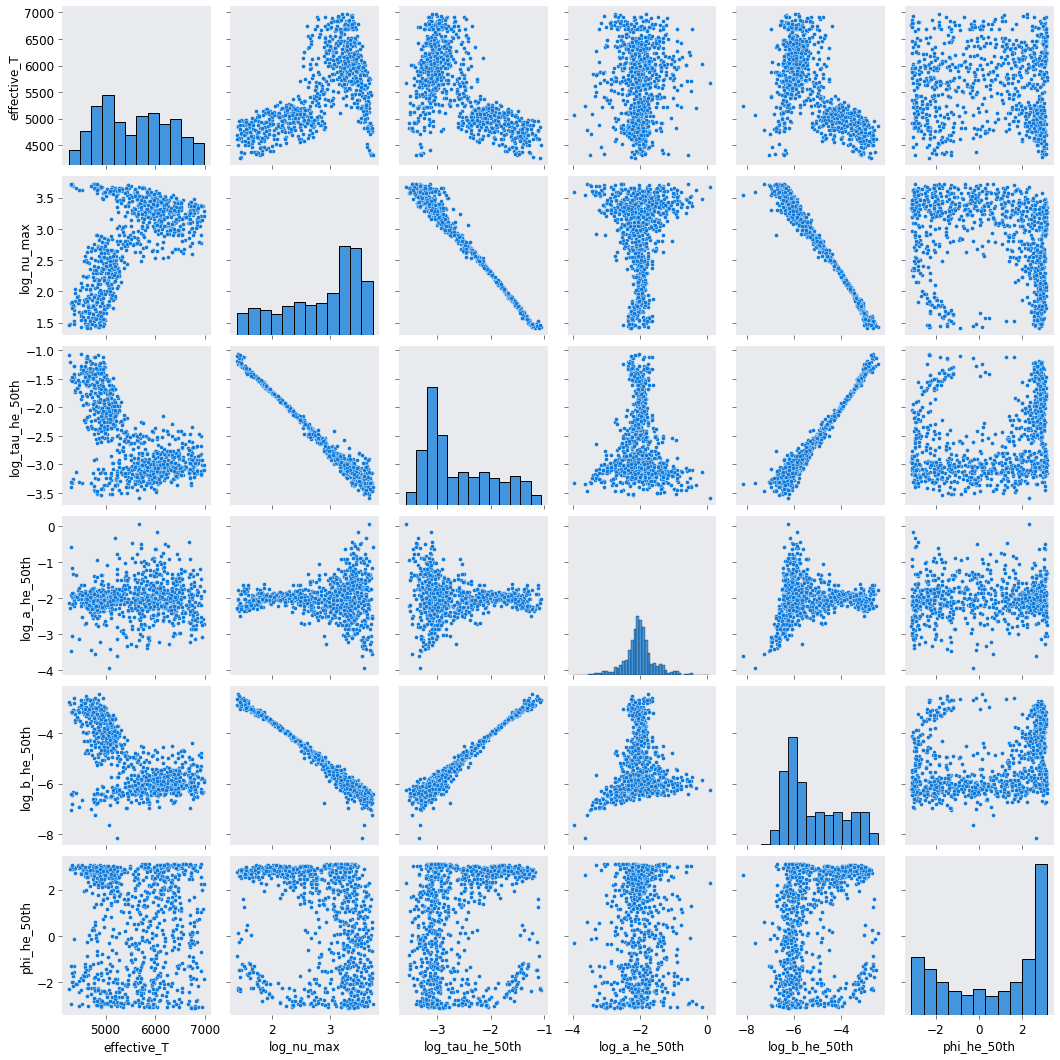

In [7]:
sns.pairplot(
    total, 
    vars=[
        "effective_T",
        "log_nu_max",
        "log_tau_he_50th",
        "log_a_he_50th",
        "log_b_he_50th",
        "phi_he_50th"
    ]
);

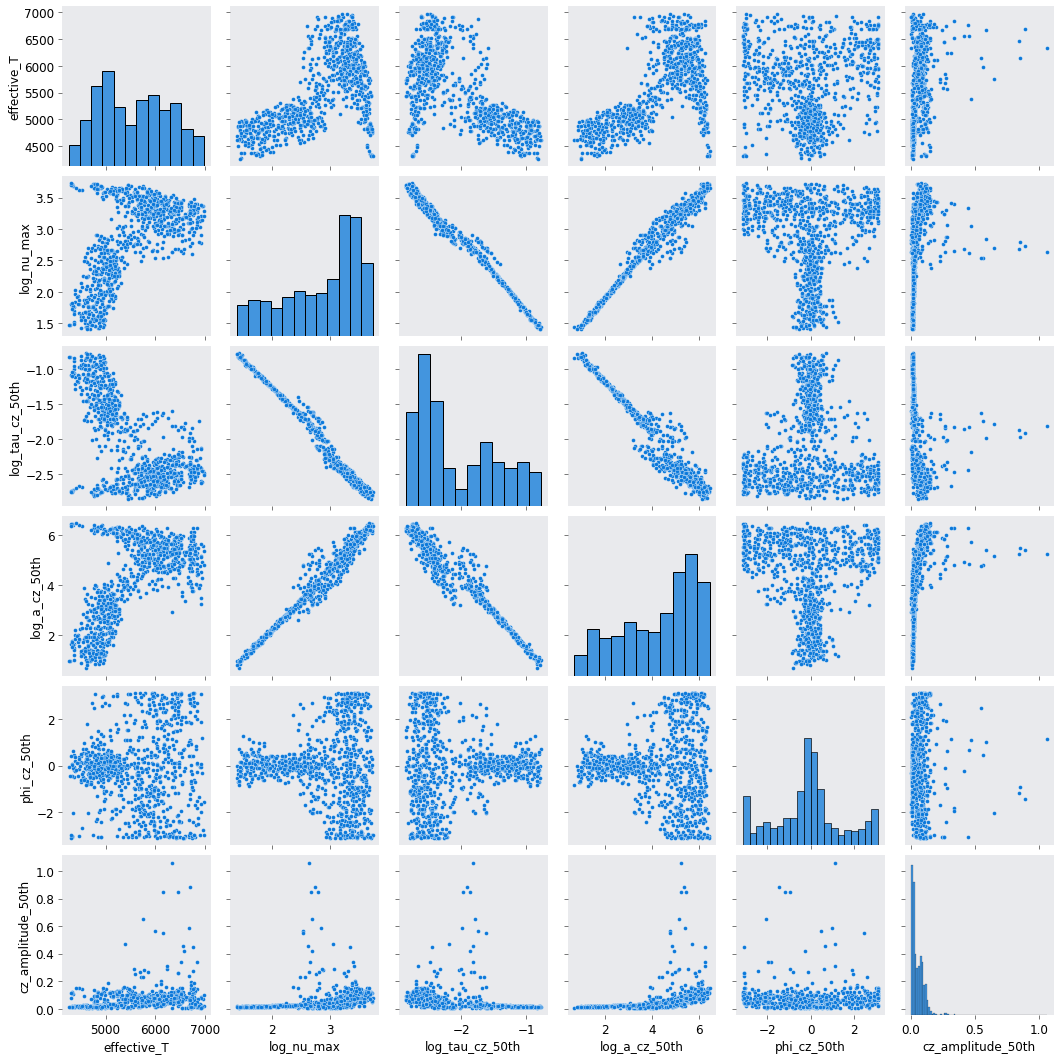

In [8]:
sns.pairplot(
    total, 
    vars=[
        "effective_T",
        "log_nu_max",
        "log_tau_cz_50th",
        "log_a_cz_50th",
        "phi_cz_50th",
        "cz_amplitude_50th",
    ]
);

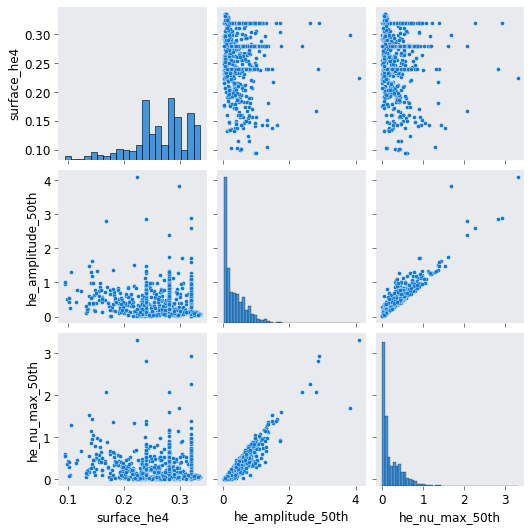

In [9]:
sns.pairplot(
    total, 
    vars=[
        "surface_he4",
        "he_amplitude_50th",
        "he_nu_max_50th",
    ]
);

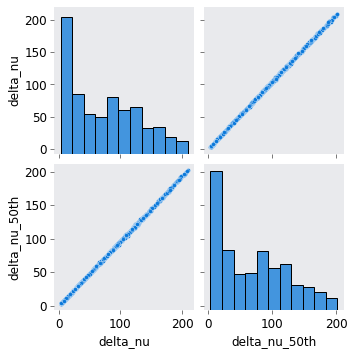

In [10]:
sns.pairplot(
    total, 
    vars=[
        "delta_nu",
        "delta_nu_50th",
    ]
);

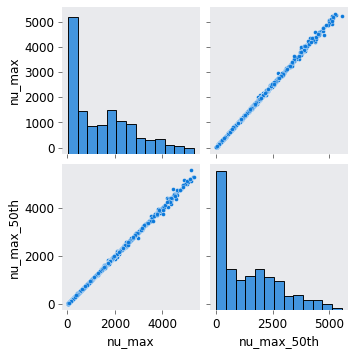

In [11]:
sns.pairplot(
    total, 
    vars=[
        "nu_max",
        "nu_max_50th",
    ]
);

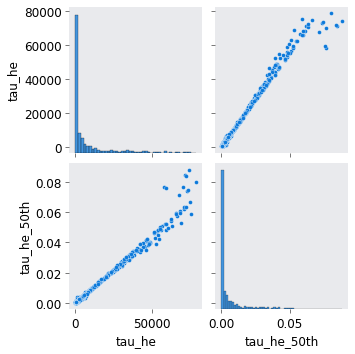

In [12]:
sns.pairplot(
    total, 
    vars=[
        "tau_he",
        "tau_he_50th",
    ]
);

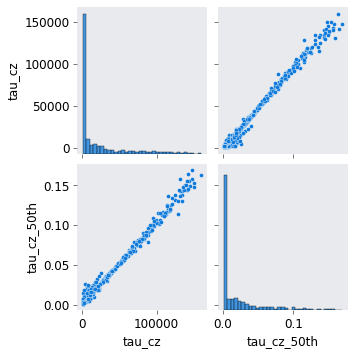

In [13]:
sns.pairplot(
    total, 
    vars=[
        "tau_cz",
        "tau_cz_50th",
    ]
);

In [14]:
total.columns[:50]

Index(['dirname', 'filename', 'initial_mass', 'initial_Yinit', 'initial_feh',
       'initial_MLT', 'effective_T', 'radius', 'delta_nu', 'nu_max',
       'acoustic_cutoff', 'tau_he', 'tau_cz', 'surface_he4', 'star_feh',
       'nu_0_1', 'nu_0_2', 'nu_0_3', 'nu_0_4', 'nu_0_5', 'nu_0_6', 'nu_0_7',
       'nu_0_8', 'nu_0_9', 'nu_0_10', 'nu_0_11', 'nu_0_12', 'nu_0_13',
       'nu_0_14', 'nu_0_15', 'nu_0_16', 'nu_0_17', 'nu_0_18', 'nu_0_19',
       'nu_0_20', 'nu_0_21', 'nu_0_22', 'nu_0_23', 'nu_0_24', 'nu_0_25',
       'nu_0_26', 'nu_0_27', 'nu_0_28', 'nu_0_29', 'nu_0_30', 'nu_0_31',
       'nu_0_32', 'nu_0_33', 'nu_0_34', 'nu_0_35'],
      dtype='object')

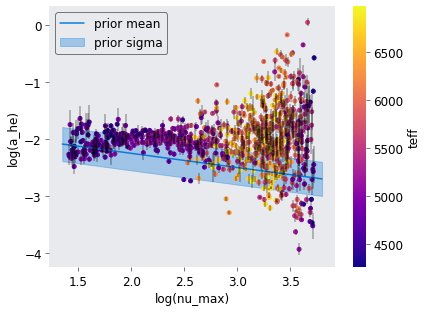

In [276]:
fig, ax = plt.subplots()

log_numax = np.linspace(1.35, 3.8)
log_a = -0.25*log_numax - 1.75
sigma = 0.3
line, = ax.plot(log_numax, log_a, label="prior mean")
ax.fill_between(log_numax, log_a-sigma, log_a+sigma, color=line.get_color(), alpha=0.33, label="prior sigma") 

s = ax.scatter(
    np.log10(total["nu_max"]), 
    total["log_a_he_mean"], 
    c=total["effective_T"]
)

ax.errorbar(
    np.log10(total["nu_max"]), 
    total["log_a_he_mean"], 
    yerr=total["log_a_he_sd"],
    linestyle="none",
    color="black",
    alpha=0.33,
)

ax.set_xlabel("log(nu_max)")
ax.set_ylabel("log(a_he)")
ax.legend()

fig.colorbar(s, label="teff")

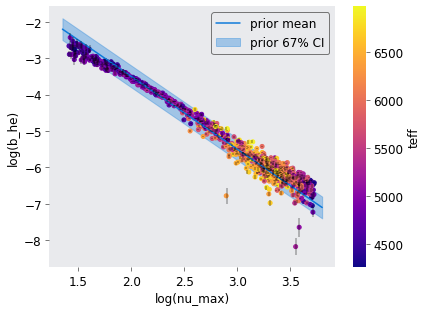

In [277]:
fig, ax = plt.subplots()

log_b = - 2.0 * log_numax + 0.5
sigma = 0.3
line, = ax.plot(log_numax, log_b, label="prior mean")
ax.fill_between(log_numax, log_b-sigma, log_b+sigma, color=line.get_color(), alpha=0.33, label="prior 67% CI") 

s = ax.scatter(
    np.log10(total["nu_max"]), 
    total["log_b_he_mean"], 
    c=total["effective_T"]
)

ax.errorbar(
    np.log10(total["nu_max_mean"]), 
    total["log_b_he_mean"], 
    yerr=total["log_b_he_sd"],
    linestyle="none", 
    color="black",
    alpha=0.33,
)

ax.set_xlabel("log(nu_max)")
ax.set_ylabel("log(b_he)")
ax.legend()

fig.colorbar(s, label="teff")

WARNING[2022-05-19 12:11:25,709]: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


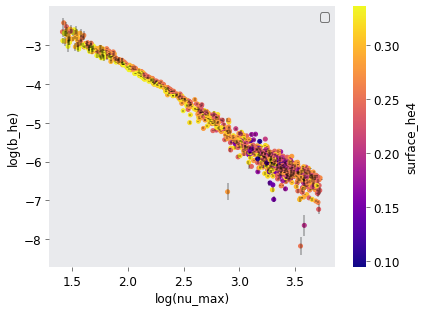

In [17]:
fig, ax = plt.subplots()

total["sort_by"] = abs(total["log_a_he_mean"] + 2)
df = total.sort_values("sort_by", ascending=False)

s = ax.scatter(
    np.log10(df["nu_max"]), 
    df["log_b_he_mean"], 
    c=df["surface_he4"]
)

ax.errorbar(
    np.log10(df["nu_max_mean"]), 
    df["log_b_he_mean"], 
    yerr=df["log_b_he_sd"],
    linestyle="none", 
    color="black",
    alpha=0.33,
)

ax.set_xlabel("log(nu_max)")
ax.set_ylabel("log(b_he)")
ax.legend()

fig.colorbar(s, label="surface_he4")

(-4.5, -2.5)

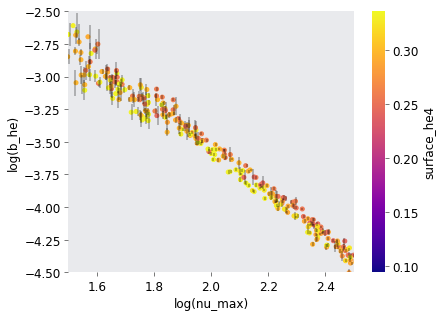

In [18]:
fig, ax = plt.subplots()

s = ax.scatter(
    np.log10(total["nu_max"]), 
    total["log_b_he_mean"], 
    c=total["surface_he4"]
)

ax.errorbar(
    np.log10(total["nu_max_mean"]), 
    total["log_b_he_mean"], 
    yerr=total["log_b_he_sd"],
    linestyle="none", 
    color="black",
    alpha=0.33,
)

ax.set_xlabel("log(nu_max)")
ax.set_ylabel("log(b_he)")

fig.colorbar(s, label="surface_he4")

ax.set_xlim(1.5, 2.5)
ax.set_ylim(-4.5, -2.5)

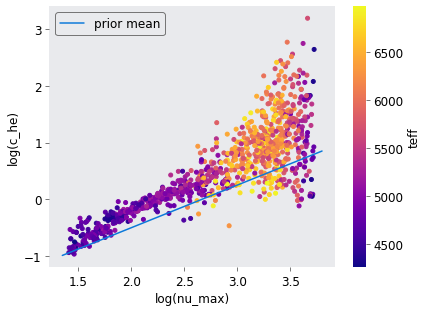

In [225]:
fig, ax = plt.subplots()

log_c = 0.75 * log_numax - 2.0
line, = ax.plot(log_numax, log_c, label="prior mean")

log_c_mean = total["log_a_he_mean"] - 0.5 * total["log_b_he_mean"]
s = ax.scatter(
    np.log10(total["nu_max"]), 
    log_c_mean, 
    c=total["effective_T"]
)

ax.set_xlabel("log(nu_max)")
ax.set_ylabel("log(c_he)")
ax.legend()

fig.colorbar(s, label="teff")

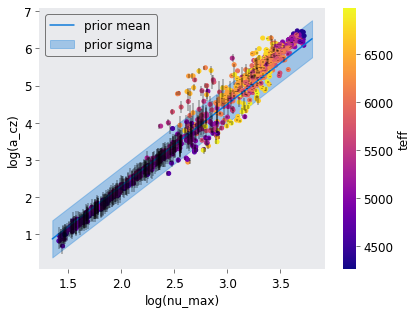

In [93]:
fig, ax = plt.subplots()

log_a = 2.2 * log_numax - 2.1
sigma = 0.5
line, = ax.plot(log_numax, log_a, label="prior mean")
ax.fill_between(log_numax, log_a-sigma, log_a+sigma, color=line.get_color(), alpha=0.33, label="prior sigma") 

mask = (total["effective_T"] < 7000)

s = ax.scatter(
    np.log10(total["nu_max"]), 
    total["log_a_cz_mean"], 
    c=total["effective_T"]
)

ax.errorbar(
    np.log10(total.loc[mask, "nu_max_mean"]), 
    total.loc[mask, "log_a_cz_mean"], 
    yerr=total.loc[mask, "log_a_cz_sd"],
    linestyle="none", 
    color="black",
    alpha=0.33,
)

ax.set_xlabel("log(nu_max)")
ax.set_ylabel("log(a_cz)")
ax.legend()

fig.colorbar(s, label="teff")

WARNING[2022-05-19 14:06:36,155]: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


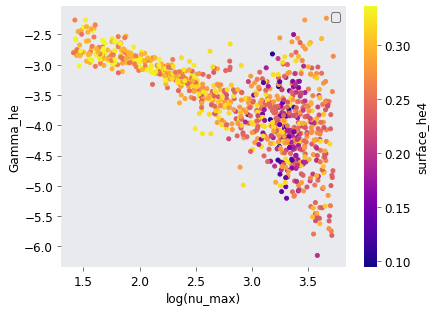

In [94]:
fig, ax = plt.subplots()

dgamma_gamma = total["log_a_he_mean"] - np.log10(total["delta_nu_mean"])

s = ax.scatter(
    np.log10(total["nu_max"]), 
    dgamma_gamma, 
    c=total["surface_he4"]
)

ax.set_xlabel("log(nu_max)")
ax.set_ylabel("Gamma_he")
ax.legend()

fig.colorbar(s, label="surface_he4")

In [95]:
def logistic(x, x0, k):
    return 1 / (1 + np.exp(-k * (x - x0)))

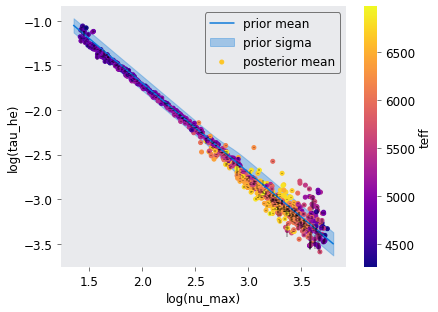

In [96]:
fig, ax = plt.subplots()

x0 = 2.8
k = 20.0
log_tau_he = - log_numax + 0.3
sigma = 0.08 + 0.05 * logistic(log_numax, x0, k)
line, = ax.plot(log_numax, log_tau_he, label="prior mean")
ax.fill_between(log_numax, log_tau_he-sigma, log_tau_he+sigma, color=line.get_color(), alpha=0.33, label="prior sigma") 

s = ax.scatter(
    np.log10(total.loc[mask, "nu_max_mean"]), 
    total.loc[mask, "log_tau_he_mean"], 
    c=total.loc[mask, "effective_T"],
    label="posterior mean",
)

ax.errorbar(
    np.log10(total.loc[mask, "nu_max_mean"]), 
    total.loc[mask, "log_tau_he_mean"], 
    yerr=total.loc[mask, "log_tau_he_sd"],
    linestyle="none",
    color="black",
    alpha=0.33,
)

ax.set_xlabel("log(nu_max)")
ax.set_ylabel("log(tau_he)")
ax.legend()

fig.colorbar(s, label="teff");

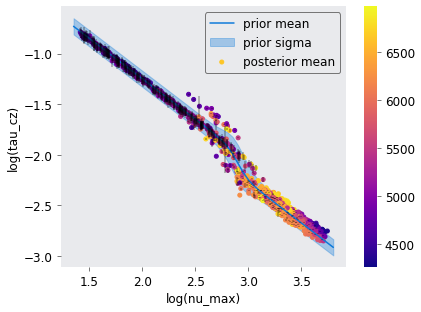

In [97]:
fig, ax = plt.subplots()

x0 = 2.9
k = 20.0
log_tau_cz = - 0.225 * logistic(log_numax, x0, k) - 0.8 * log_numax + 0.35
# sigma = 0.05 + 0.025 * logistic(log_numax, x0, k)
sigma = 0.08 + 0.1 * np.exp(- 0.5 * (log_numax - x0)**2/0.1**2)
line, = ax.plot(log_numax, log_tau_cz, label="prior mean")
ax.fill_between(log_numax, log_tau_cz-sigma, log_tau_cz+sigma, color=line.get_color(), alpha=0.33, label="prior sigma") 

s = ax.scatter(
    np.log10(total.loc[mask, "nu_max_mean"]), 
    total.loc[mask, "log_tau_cz_mean"], 
    c=total.loc[mask, "effective_T"],
    label="posterior mean",
)

ax.errorbar(
    np.log10(total.loc[mask, "nu_max_mean"]), 
    total.loc[mask, "log_tau_cz_mean"], 
    yerr=total.loc[mask, "log_tau_cz_sd"],
    linestyle="none",
    color="black",
    alpha=0.33,
)

ax.set_xlabel("log(nu_max)")
ax.set_ylabel("log(tau_cz)")
ax.legend()

fig.colorbar(s);

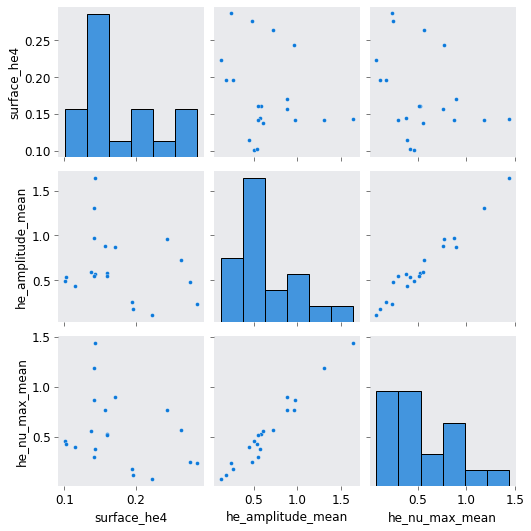

In [98]:
mask = (total["initial_mass"] > 0.9) & (total["initial_mass"] < 1.1) & (total["nu_max"] > 1000) & (total["nu_max"] < 2000) 
sns.pairplot(
    total[mask], 
    vars=[
        "surface_he4",
        "he_amplitude_mean",
        "he_nu_max_mean",
    ]
);

In [99]:
low, high = (0, 4000)
# total["he_amplitude_norm"] = (
#     total["a_he_mean"] * (np.exp(- total["b_he_mean"] * low**2) - np.exp(- total["b_he_mean"] * high**2)) 
#     / (2 * total["b_he_mean"] * (high - low))
# )

# total["he_amplitude_norm"] = (
#     total["a_he_mean"] * np.exp(- total["b_he_mean"] * total["nu_max"]**2)
# )

# total["he_amplitude_norm"] = total["he_nu_max_mean"] / total["nu_max_mean"]
total["he_amplitude_norm"] = total["b_he_mean"] * total["nu_max_mean"]**2

# total["log_he_amplitude_norm"] = np.log10(total["he_amplitude_norm"])

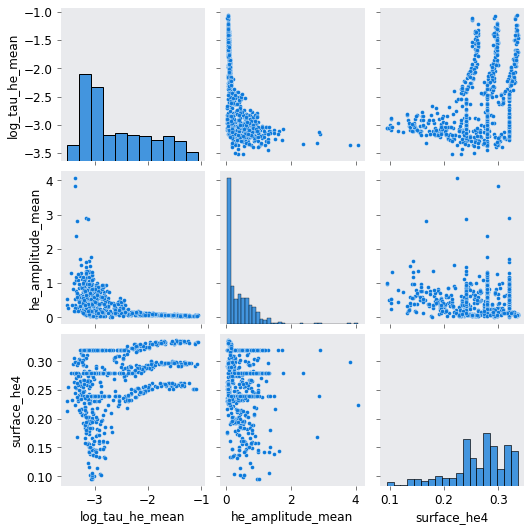

In [100]:
mask = (total["initial_mass"] > 0.8) & (total["initial_mass"] < 1.5)
sns.pairplot(
    total[mask], 
    vars=[
        "log_tau_he_mean",
        "he_amplitude_mean",
        "surface_he4"
#         "he_nu_max_mean",
#         "he_amplitude_norm",
    ]
);

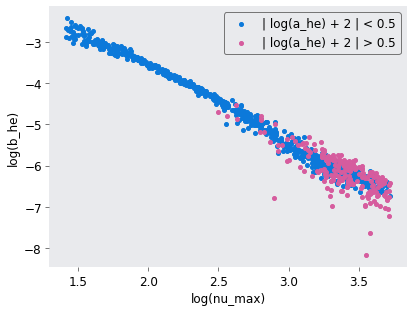

In [102]:
fig, ax = plt.subplots()

mask = abs(total["log_a_he_mean"] + 2) < 0.5

ax.scatter(
    np.log10(total.loc[mask, "nu_max"]), 
    total.loc[mask, "log_b_he_mean"], 
    label="| log(a_he) + 2 | < 0.5"
)

ax.scatter(
    np.log10(total.loc[~mask, "nu_max"]), 
    total.loc[~mask, "log_b_he_mean"], 
    label="| log(a_he) + 2 | > 0.5"
)

ax.set_xlabel("log(nu_max)")
ax.set_ylabel("log(b_he)")
ax.legend();

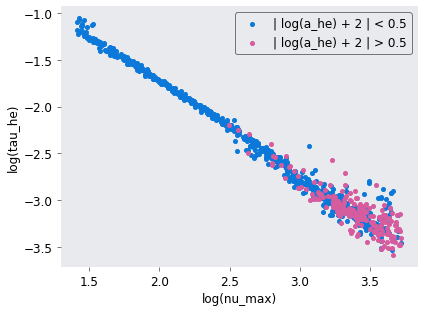

In [103]:
fig, ax = plt.subplots()

mask = abs(total["log_a_he_mean"] + 2) < 0.5

ax.scatter(
    np.log10(total.loc[mask, "nu_max"]), 
    total.loc[mask, "log_tau_he_mean"], 
    label="| log(a_he) + 2 | < 0.5"
)

ax.scatter(
    np.log10(total.loc[~mask, "nu_max"]), 
    total.loc[~mask, "log_tau_he_mean"], 
    label="| log(a_he) + 2 | > 0.5"
)

ax.set_xlabel("log(nu_max)")
ax.set_ylabel("log(tau_he)")
ax.legend();

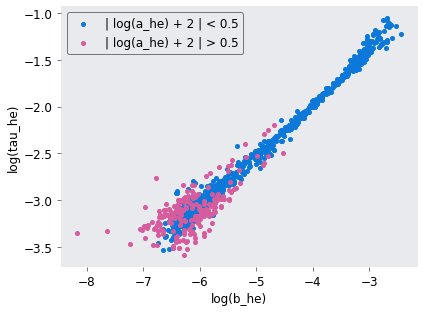

In [104]:
fig, ax = plt.subplots()

mask = abs(total["log_a_he_mean"] + 2) < 0.5

ax.scatter(
    total.loc[mask, "log_b_he_mean"], 
    total.loc[mask, "log_tau_he_mean"], 
    label="| log(a_he) + 2 | < 0.5"
)

ax.scatter(
    total.loc[~mask, "log_b_he_mean"], 
    total.loc[~mask, "log_tau_he_mean"], 
    label="| log(a_he) + 2 | > 0.5"
)

ax.set_xlabel("log(b_he)")
ax.set_ylabel("log(tau_he)")
ax.legend();

It looks like when a_he deviates from -2 it corresponds to the acoustic depth deviating from a power law with the decay parameter. Could this be showing that a higher a_he than expected comes from a shallower acoustic depth glitch than expected for a given glitch decay. Or, higher a_he than expected correlates with a higher b_he for a given acoustic depth tau_he. In other words, this seems to just be a strong correlation between a_he and b_he. Higher a_he should be due to deeper depression in gamma_1...

There is a degeneracy between a_he and b_he. Since the depression in the first adiabatic exponant caused by the glitch has a depth which scales as a_he / delta_nu / sqrt(b_he) (Houdek and Gough 2007) then for a given delta_nu, the same glitch depth can come from both a_he and b_he increasing or decreasing. Because b_he causes the decay, this should also 

In [20]:
path = "/Volumes/daviesgr-cartography/mesa_grid/grid2p5_zams_rgb_ov/grid_2p5"

In [21]:
import zipfile
import gyraffe
from gyraffe.io import read_mesa_profile

In [261]:
mask = (total["log_a_he_mean"] + 1 > 0.5)
idx = np.random.choice(total[mask].index)
archive_name = os.path.join(path, total.loc[idx, "dirname"], "GYRE.zip")

In [262]:
with zipfile.ZipFile(archive_name, 'r') as archive:
#     print(archive.namelist()[0])
    with archive.open(os.path.join(total.loc[idx, "dirname"], total.loc[idx, "filename"] + ".data.GYRE")) as file:
#         for i in range(10):
#             print(file.readline())
        profile = read_mesa_profile(file)

In [263]:
profile.head()

,k,r,M_r,L_r,P,T,rho,nabla,N^2,Gamma_1,nabla_ad,delta,kap,kap kap_T,kap kap_rho,eps_nuc,eps_nuc*eps_T,eps_nuc*eps_rho,Omega_rot
0,1,0.000000e+00,0.000000e+00,0.000000e+00,1.682735e+17,1.398506e+07,116.110019,0.328568,0.000000e+00,1.666052,0.396018,0.978831,2.170706,-4.390910,0.836060,8.721697,97.861296,9.146102,0.0
1,2,6.600834e+07,1.398748e+26,1.220742e+27,1.682657e+17,1.398485e+07,116.103696,0.328573,1.818016e-09,1.666051,0.396018,0.978831,2.170746,-4.391027,0.836086,8.721395,97.856440,9.145777,0.0
2,3,8.316582e+07,2.797495e+26,2.441455e+27,1.682606e+17,1.398471e+07,116.099758,0.328575,2.268307e-09,1.666050,0.396018,0.978832,2.170771,-4.391105,0.836104,8.721151,97.852790,9.145516,0.0
3,4,1.047834e+08,5.594990e+26,4.882756e+27,1.682527e+17,1.398449e+07,116.094336,0.328576,3.327909e-09,1.666050,0.396018,0.978832,2.170812,-4.391230,0.836131,8.720592,97.845299,9.144923,0.0
4,5,1.320208e+08,1.118998e+27,9.764967e+27,1.682401e+17,1.398415e+07,116.085614,0.328575,5.150058e-09,1.666048,0.396018,0.978832,2.170876,-4.391428,0.836175,8.719741,97.833777,9.144018,0.0


In [264]:
profile["c"] = gyraffe.sound_speed(profile)
profile["tau"] = gyraffe.acoustic_depth(profile)

In [265]:
gamma0 = 1.651
def he_ionisation_zone(tau, tau_he, gamma_he, delta_he):
    return - gamma_he / np.sqrt(2*np.pi) / delta_he * np.exp(- 0.5 * (tau - tau_he)**2 / delta_he**2)

In [266]:
gamma_he = 1e6 * (total.loc[idx, "a_he_mean"] / total.loc[idx, "delta_nu_mean"])
delta_he = 1e6 * (0.5 * np.sqrt(0.5 * total.loc[idx, "b_he_mean"]) / np.pi)
tau_he = 1e6 * total.loc[idx, "tau_he_mean"]

In [267]:
print(profile["tau"].max(), 1e6 / 2 / total.loc[idx, "delta_nu_mean"])

2953.330933188611 2978.440322799705


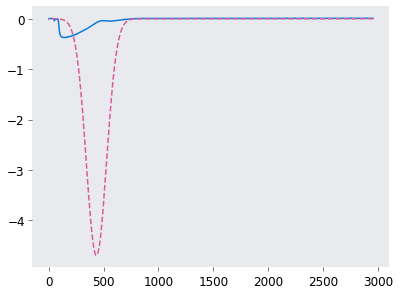

In [268]:
fig, ax = plt.subplots()

dgamma = (profile["Gamma_1"] - gamma0) / profile["Gamma_1"]
y = he_ionisation_zone(profile["tau"], tau_he, 0.4*gamma_he, delta_he)

ax.plot(profile["tau"], dgamma)
ax.plot(profile["tau"], y)

In [275]:
total.loc[idx, "log_a_he_mean"] - 0.5 * total.loc[idx, "log_b_he_mean"]

2.7439280166000204

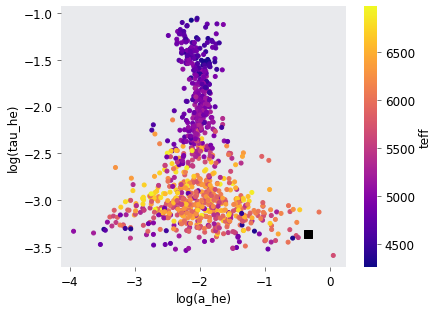

In [270]:
fig, ax = plt.subplots()

s = ax.scatter(
    total["log_a_he_mean"], 
    total["log_tau_he_mean"], 
    c=total["effective_T"]
)

ax.scatter(
    total.loc[idx, "log_a_he_mean"], 
    total.loc[idx, "log_tau_he_mean"], 
    c="black",
    s=64,
    marker="s",
)

ax.set_xlabel("log(a_he)")
ax.set_ylabel("log(tau_he)")

fig.colorbar(s, label="teff")

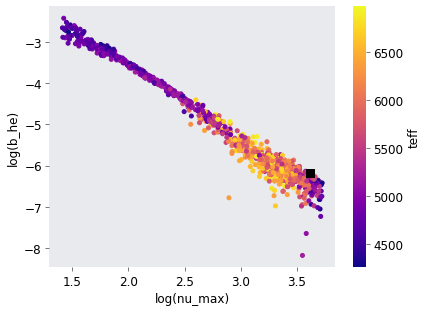

In [273]:
fig, ax = plt.subplots()

s = ax.scatter(
    total["log_nu_max"], 
    total["log_b_he_mean"], 
    c=total["effective_T"]
)

ax.scatter(
    total.loc[idx, "log_nu_max"], 
    total.loc[idx, "log_b_he_mean"], 
    c="black",
    s=64,
    marker="s",
)

ax.set_xlabel("log(nu_max)")
ax.set_ylabel("log(b_he)")

fig.colorbar(s, label="teff")

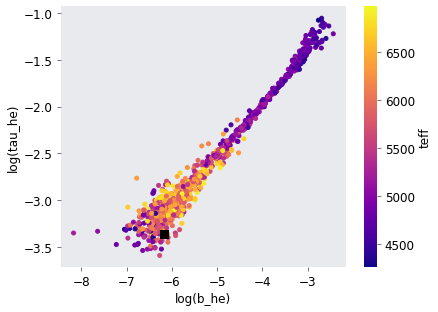

In [271]:
fig, ax = plt.subplots()

s = ax.scatter(
    total["log_b_he_mean"], 
    total["log_tau_he_mean"], 
    c=total["effective_T"]
)

ax.scatter(
    total.loc[idx, "log_b_he_mean"], 
    total.loc[idx, "log_tau_he_mean"], 
    c="black",
    s=64,
    marker="s",
)

ax.set_xlabel("log(b_he)")
ax.set_ylabel("log(tau_he)")

fig.colorbar(s, label="teff")

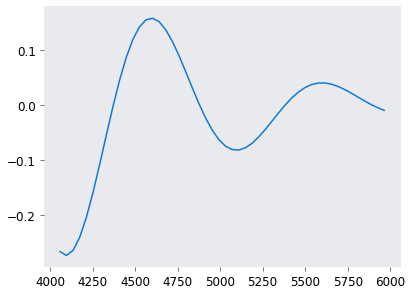

In [159]:
star = total.loc[idx]

nu = np.linspace(star["nu_max"] - 5 * star["delta_nu"], star["nu_max"] + 5 * star["delta_nu"] )
dnu_he = star["a_he_mean"] * nu * np.exp(- star["b_he_mean"] * nu**2) * \
    np.sin(4 * np.pi * star["tau_he_mean"] * nu + star["phi_he_mean"])

fig, ax = plt.subplots()
ax.plot(nu, dnu_he)

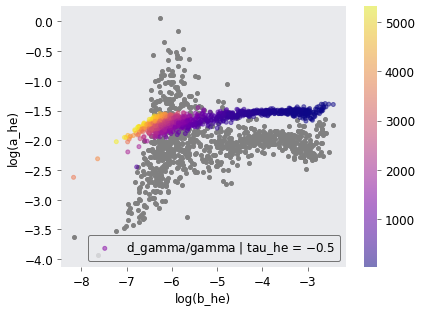

In [190]:
fig, ax = plt.subplots()

ax.scatter(
    total["log_b_he_mean"],
    total["log_a_he_mean"], 
    c="grey",
    label=""
)

log_a = 0.5 * (total["log_b_he_mean"] + 2 * np.log10(total["delta_nu_mean"]) - np.log10(8*np.pi))
s = ax.scatter(
    total["log_b_he_mean"], 
    log_a, 
    c=total["nu_max"],
    alpha=0.5,
    label="d_gamma/gamma | tau_he = $- 0.5$"
)

ax.set_xlabel("log(b_he)")
ax.set_ylabel("log(a_he)")
fig.colorbar(s)
ax.legend();

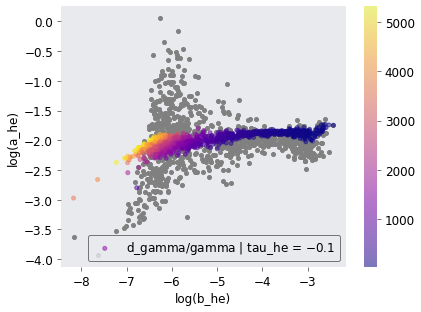

In [192]:
fig, ax = plt.subplots()

ax.scatter(
    total["log_b_he_mean"],
    total["log_a_he_mean"], 
    c="grey",
    label=""
)

log_a = 0.5 * (total["log_b_he_mean"] + 2 * np.log10(total["delta_nu_mean"]) - np.log10(40*np.pi))
s = ax.scatter(
    total["log_b_he_mean"], 
    log_a, 
    c=total["nu_max"],
    alpha=0.5,
    label="d_gamma/gamma | tau_he = $- 0.1$"
)

ax.set_xlabel("log(b_he)")
ax.set_ylabel("log(a_he)")
fig.colorbar(s)
ax.legend();

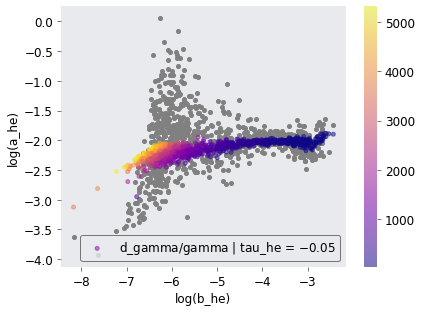

In [193]:
fig, ax = plt.subplots()

ax.scatter(
    total["log_b_he_mean"],
    total["log_a_he_mean"], 
    c="grey",
    label=""
)

log_a = 0.5 * (total["log_b_he_mean"] + 2 * np.log10(total["delta_nu_mean"]) - np.log10(80*np.pi))
s = ax.scatter(
    total["log_b_he_mean"], 
    log_a, 
    c=total["nu_max"],
    alpha=0.5,
    label="d_gamma/gamma | tau_he = $- 0.05$"
)

ax.set_xlabel("log(b_he)")
ax.set_ylabel("log(a_he)")
fig.colorbar(s)
ax.legend();

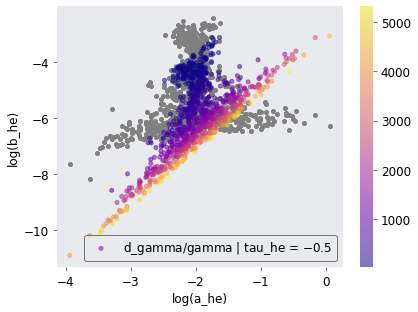

In [188]:
fig, ax = plt.subplots()

ax.scatter(
    total["log_a_he_mean"], 
    total["log_b_he_mean"],
    c="grey",
    label=""
)

log_b = 2 * total["log_a_he_mean"] + np.log10(8*np.pi) - 2 * np.log10(total["delta_nu_mean"])
s = ax.scatter(
    total["log_a_he_mean"], 
    log_b, 
    c=total["nu_max"],
    alpha=0.5,
    label="d_gamma/gamma | tau_he = $- 0.5$"
)

ax.set_xlabel("log(a_he)")
ax.set_ylabel("log(b_he)")
fig.colorbar(s)
ax.legend();

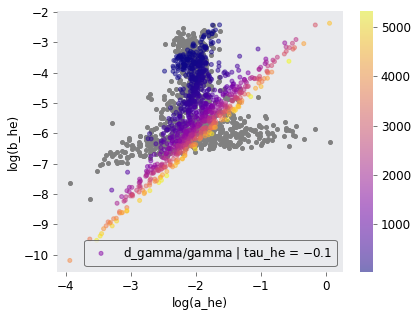

In [177]:
fig, ax = plt.subplots()

ax.scatter(
    total["log_a_he_mean"], 
    total["log_b_he_mean"],
    c="grey",
    label=""
)

log_b = 2 * total["log_a_he_mean"] + np.log10(40*np.pi) - 2 * np.log10(total["delta_nu_mean"])
s = ax.scatter(
    total["log_a_he_mean"], 
    log_b, 
    c=total["nu_max"],
    alpha=0.5,
    label="d_gamma/gamma | tau_he = $- 0.1$"
)

ax.set_xlabel("log(a_he)")
ax.set_ylabel("log(b_he)")
fig.colorbar(s)
ax.legend();

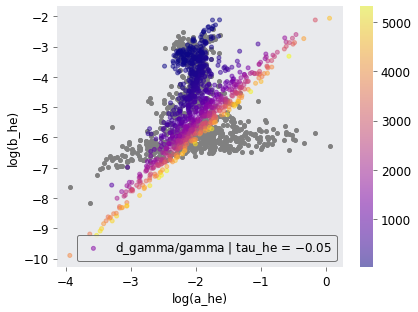

In [183]:
fig, ax = plt.subplots()

ax.scatter(
    total["log_a_he_mean"], 
    total["log_b_he_mean"],
    c="grey",
    label=""
)

log_b = 2 * total["log_a_he_mean"] + np.log10(80*np.pi) - 2 * np.log10(total["delta_nu_mean"])
s = ax.scatter(
    total["log_a_he_mean"], 
    log_b, 
    c=total["nu_max"],
    alpha=0.5,
    label="d_gamma/gamma | tau_he = $- 0.05$"
)

ax.set_xlabel("log(a_he)")
ax.set_ylabel("log(b_he)")
fig.colorbar(s)
ax.legend();

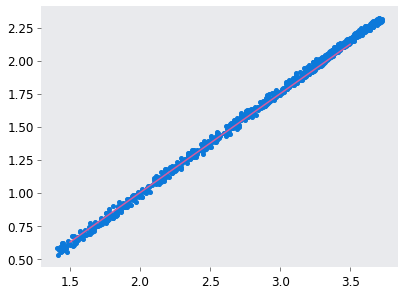

In [220]:
plt.scatter((total["log_nu_max"]), np.log10(total["delta_nu"]))
x = np.linspace(1.5, 3.5)
y = 0.75 * x - 0.5
plt.plot(x, y, c="C1")

In [207]:
1/0.75

1.3333333333333333

In [221]:
- 0.5 - np.log10(2*np.sqrt(np.pi)) - 1

-2.0496049320110483

In [212]:
-0.9 + 0.25

-0.65

In [214]:
np.log10(2*np.sqrt(np.pi))

0.5496049320110481

In [223]:
- 2 + 0.25

-1.75